In [1]:
# -*- coding: utf-8 -*-

from __future__ import division, unicode_literals

import re
import math
import networkx
import numpy as np

from konlpy import tag as taggers
from collections import Counter
from gensim.corpora import Dictionary, TextCorpus
from gensim.models import TfidfModel
from sklearn.cluster import Birch, DBSCAN, AffinityPropagation
from sklearn.feature_extraction import DictVectorizer


stopwords_ko = ["저", "것", "동시에", "몇", "고려하면", "관련이", "놀라다", "무엇", "어느쪽", "오", "정도의", "더구나", "아무도", "줄은모른다", "참", "아니", "휘익", "향하다", "응당", "알겠는가", "인젠", "그래서", "자신", "해서는", "둘", "이었다", "임에", "하도록시키다", "누구", "이때", "삼", "제외하고", "쿵", "하면", "좀", "그렇지않으면", "아니었다면", "이라면", "팍", "일", "통하여", "무엇때문에", "보아", "하게하다", "하는", "이르다", "타다", "까지도", "오직", "도달하다", "잠깐", "외에", "심지어", "하려고하다", "게다가", "후", "알", "비하면", "헉헉", "근거로", "월", "따라서", "않는다면", "일지라도", "함께", "이유는", "흥", "혼자", "관하여", "붕붕", "하다", "진짜로", "의해", "바와같이", "대하면", "퍽", "보다더", "그렇게", "끼익", "댕그", "시초에", "당장", "하는것만", "누가", "만이", "만일", "이지만", "하마터면", "꽈당", "만은", "우선", "없다", "휴", "하도록하다", "그런데", "비로소", "하게될것이다", "만큼 어찌됏든", "오히려", "을", "더라도", "안", "왜냐하면", "습니다", "줄은", "그리하여", "하", "어떻게", "대로", "기대여", "끙끙", "예를", "와르르", "이리하여", "이", "조차", "하고", "이젠", "뒤이어", "할줄알다", "반대로", "시각", "펄렁", "잇따라", "공동으로", "비록", "가까스로", "여덟", "비슷하다", "이상", "차라리", "이어서", "모두", "툭", "조차도", "헉", "부터", "혹시", "않고", "우리", "삐걱", "여보시오", "허", "해요", "견지에서", "하기는한데", "토하다", "않으면", "이봐", "관계가", "한다면", "시작하여", "연이서", "이외에도", "그", "운운", "에게", "그럼에도", "예", "만약에", "했어요", "결과에", "제", "오자마자", "것들", "약간", "것과", "일때", "셋", "각종", "아이구", "같은", "향해서", "일것이다", "해야한다", "아이야", "로", "편이", "등등", "해도좋다", "하기에", "김에", "몰랏다", "같이", "하도다", "즉시", "갖고말하자면", "우에", "어느", "허허", "하자마자", "에서", "그래도", "하여야", "된이상", "까악", "한켠으로는", "많은", "그중에서", "사", "낼", "뿐만", "저쪽", "어쩔수", "어떤것들", "물론", "결론을", "이만큼", "이렇게되면", "소인", "바꾸어말하면", "들", "이렇구나", "하물며", "얼마간", "얼마든지", "한항목", "하는것도", "졸졸", "한마디", "말할것도", "만약", "남들", "총적으로", "허걱", "그리고", "따지지", "구체적으로", "못하다    하기보다는", "언제", "따르는", "구토하다", "앞에서", "대해서", "아", "앞의것", "비걱거리다", "헐떡헐떡", "어찌하든지", "입장에서", "의", "마저", "바로", "하기만", "않기", "또한", "쓰여", "위해서", "의거하여", "인", "아니면", "를", "사람들", "할수있다", "일곱", "근거하여", "한적이있다", "함으로써", "낫다", "어떤것", "방면으로", "중의하나", "어", "무릎쓰고", "저것만큼", "서술한바와같이", "그런즉", "들자면", "하지", "아이고", "불문하고", "만", "마저도", "얼마만큼", "예컨대", "이렇게말하자면", "연관되다", "않다면", "들면", "이쪽", "의지하여", "여섯", "그저", "아니다", "그렇지만", "기준으로", "되어", "가", "무렵", "즉", "말하면", "어찌", "그럼", "그위에", "그런", "조금", "매번", "혹은", "이천구", "중에서", "따름이다", "하기", "가령", "잠시", "아무거나", "하기보다는", "주저하지", "당신", "봐라", "그렇지", "자기집", "할지라도", "요만한걸", "우르르", "못하다", "왜", "이렇게", "퉤", "관계없이", "그래", "대해", "쪽으로", "저것", "자기", "아홉", "지만", "구", "하지마", "따위", "하지만", "나", "해도", "전자", "그만이다", "안된다", "까닭으로", "되다", "오르다", "딱", "다음에", "너희들", "점에서", "아이쿠", "쾅쾅", "종합한것과같이", "할수있어", "그치지", "비교적", "륙", "되는", "개의치않고", "엉엉", "하든지", "때가", "영차", "바꿔", "더불어", "주룩주룩", "따라", "이용하여", "우리들", "여기", "더욱이는", "하더라도", "입각하여", "여러분", "마치", "하느니", "너", "어디", "제각기", "밖에", "봐", "위하여", "팔", "요만큼", "가서", "아니라면", "지든지", "참나", "할만하다", "타인", "든간에", "하겠는가", "거바", "겨우", "다음", "이러한", "이럴정도로", "각자", "어때", "지말고", "형식으로", "그러한즉", "아니나다를가", "할", "불구하고", "지경이다", "어떠한", "기점으로", "할때", "등", "다시", "시키다", "답다", "소생", "라", "로써", "각", "부류의", "알았어", "훨씬", "위에서", "뿐이다", "시간", "그러나", "하곤하였다", "일단", "막론하고", "좋아", "솨", "이곳", "뿐만아니라", "아울러", "옆사람", "다수", "예하면", "령", "어떤", "어떻해", "할수록", "말하자면", "전후", "메쓰겁다", "에", "으로써", "이번", "하면된다", "이것", "딩동", "양자", "달려", "본대로", "탕탕", "마음대로", "쉿", "미치다", "다시말하면", "동안", "그러니까", "과연", "뚝뚝", "거의", "이천팔", "이로", "않도록", "또", "한하다", "아래윗", "수", "다소", "어느것", "까지", "남짓", "저기", "관한", "무슨", "그에", "년도", "삐걱거리다", "이러이러하다", "와", "넷", "쳇", "논하지", "습니까", "이천육", "기타", "오로지", "어느곳", "설령", "할지언정", "칠", "다만", "반드시", "한데", "곧", "의해서", "얼마나", "아니라", "상대적으로", "너희", "있다", "인하여", "다섯", "생각이다", "몰라도", "정도에", "버금", "까닭에", "얼마큼", "전부", "로부터", "힘입어", "틈타", "해도된다", "나머지는", "흐흐", "그때", "하여금", "모", "이런", "바꾸어서", "비추어", "각각", "설사", "이래", "비길수", "하지마라", "응", "다른", "듯하다", "보는데서", "어쨋든", "대하여", "좍좍", "으로", "여차", "틀림없다", "과", "고로", "요컨대", "일반적으로", "줄", "하는바", "그들", "요만한", "윙윙", "콸콸", "어기여차", "언젠가", "이와", "할망정", "이천칠", "네", "없고", "둥둥", "겸사겸사", "그러므로", "안다", "거니와", "년", "여부", "때문에", "된바에야", "향하여", "때", "하하", "및", "오호", "하면서", "더군다나", "한", "이유만으로", "어이", "하나", "저희", "더욱더", "두번째로", "바꾸어말하자면", "이와같다면", "이르기까지", "단지", "그러면", "야", "결국", "영", "뒤따라", "즈음하여", "도착하다", "와아", "다음으로", "같다", "자", "아하", "생각한대로", "외에도", "의해되다", "설마", "으로서", "보면", "할뿐", "첫번째로", "아야", "어째서", "하는것이", "하구나", "않다", "힘이", "육", "그러니", "여전히", "어찌됏어", "어찌하여", "어느해", "앗", "게우다", "보드득", "관해서는", "자마자", "매", "하고있었다", "어느때", "여", "실로", "해봐요", "얼마", "아이"]


class LexRankError(Exception):
    pass


class Sentence(object):

    def __init__(self, text, tokens=[], index=0):
        self.index = index
        self.text = text
        self.tokens = tokens
        self.counter = Counter(self.tokens)

    def __unicode__(self):
        return self.text

    def __str__(self):
        return str(self.index)

    def __repr__(self):
        try:
            return self.text.encode('utf-8')
        except:
            return self.text

    def __eq__(self, another):
        return hasattr(another, 'index') and self.index == another.index

    def __hash__(self):
        return self.index


class SentenceFactory(object):

    def __init__(self, tagger, useful_tags, delimiters, min_token_length, stopwords, **kwargs):
        if tagger == 'twitter':
            self.tagger = taggers.Twitter()
            self.tagger_options = {
                'norm': bool(kwargs.get('norm', True)),
                'stem': bool(kwargs.get('stem', True)),
            }
        elif tagger == 'komoran':
            self.tagger = taggers.Komoran()
            self.tagger_options = {
                'flatten': bool(kwargs.get('flatten', True)),
            }
        elif tagger == 'hannanum':
            self.tagger = taggers.Hannanum()
            self.tagger_options = {
                'ntags': int(kwargs.get('ntags', 9)),
                'flatten': bool(kwargs.get('flatten', True)),
            }
        elif tagger == 'kkma':
            self.tagger = taggers.Kkma()
            self.tagger_options = {
                'flatten': bool(kwargs.get('flatten', True)),
            }
        elif tagger == 'mecab':
            self.tagger = taggers.Mecab()
            self.tagger_options = {
                'flatten': bool(kwargs.get('flatten', True)),
            }
        else:
            raise LexRankError("available taggers are: twitter, komoran, hannanum, kkma, mecab")
        self.useful_tags = useful_tags
        self.delimiters = delimiters
        self.stopwords = stopwords
        self.min_token_length = min_token_length
        self.splitter = self.splitterer()
        self.pos = lambda text: self.tagger.pos(text, **self.tagger_options)

    def splitterer(self):
        escaped_delimiters = '|'.join([re.escape(delimiter) for delimiter in self.delimiters])
        return lambda value: re.split(escaped_delimiters, value)

    def text2tokens(self, text):
        tokens = []
        word_tag_pairs = self.pos(text)
        for word, tag in word_tag_pairs:
            if word in self.stopwords:
                continue
            if tag not in self.useful_tags:
                continue
            tokens.append("{}/{}".format(word, tag))
        return tokens

    def text2sentences(self, text):
        candidates = self.splitter(text.strip())
        sentences = []
        index = 0
        for candidate in candidates:
            while len(candidate) and (candidate[-1] == '.' or candidate[-1] == ' '):
                candidate = candidate.strip(' ').strip('.')
            if not candidate:
                continue
            tokens = self.text2tokens(candidate)
            if len(tokens) < self.min_token_length:
                continue
            sentence = Sentence(candidate, tokens, index)
            sentences.append(sentence)
            index += 1
        return sentences


class SentenceCorpus(TextCorpus):

    def __init__(self, sentences, no_below=3, no_above=0.8, max_size=None):
        self.metadata = False
        self.sentences = sentences
        self.dictionary = Dictionary(self.get_texts(), prune_at=max_size)
        self.dictionary.filter_extremes(no_below=no_below, no_above=no_above, keep_n=max_size)
        self.dictionary.compactify()
        self.bows = [self.dictionary.doc2bow(tokens) for tokens in self.get_texts()]

    def get_texts(self):
        for sentence in self.sentences:
            yield sentence.tokens


class LexRank(object):
    def print_vector(self, size=5):
        res = []
        for i in range(self.num_sentences-size-1):
            s1 = {}
            s2 = {}
            for j in range(size):
                s1.update({word_id*10+i+j: tfidf for word_id, tfidf in self.sentences[i+j].tfidf})
                s2.update({word_id*10+i+j+1: tfidf for word_id, tfidf in self.sentences[i+j+1].tfidf})
            vector1, vector2 = self.vectorizer.fit_transform([s1, s2]).toarray()
            res.append([vector1,vector2])
            print("문장[{}-{}], 문장[{}-{}]: tfidf \n{} \n{}".format(i,i+size,i+1,i+1+size,s1,s2), end='\n')
            print("문장[{}-{}], 문장[{}-{}]: vector\n{} \n{}".format(i,i+size,i+1,i+1+size,vector1,vector2), end='\n\n')           
        return res
    
    
    def __init__(self, similarity='cosine', decay_window=20, decay_alpha=0.25, clustering='dbscan', tagger='twitter', useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'Josa', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'], delimiters=['. ', '\n', '.\n'], min_token_length=2, stopwords=stopwords_ko, no_below_word_count=2, no_above_word_portion=0.85, max_dictionary_size=None, min_cluster_size=2, similarity_threshold=0.85, matrix_smoothing=False, n_clusters=None, compactify=True, **kwargs):
        self.decay_window = decay_window
        self.decay_alpha = decay_alpha
        if similarity == 'cosine':  # very, very slow :(
            self.vectorizer = DictVectorizer()
            self.uniform_sim = self._sim_cosine
        elif similarity == 'jaccard':
            self.uniform_sim = self._sim_jaccard
        elif similarity == 'normalized_cooccurrence':
            self.uniform_sim = self._sim_normalized_cooccurrence
        else:
            raise LexRankError("available similarity functions are: cosine, jaccard, normalized_cooccurrence")
        self.sim = lambda sentence1, sentence2: self.decay(sentence1, sentence2) * self.uniform_sim(sentence1, sentence2)
        self.factory = SentenceFactory(tagger=tagger, useful_tags=useful_tags, delimiters=delimiters, min_token_length=min_token_length, stopwords=stopwords, **kwargs)
        if clustering == 'birch':
            self._birch = Birch(threshold=0.99, n_clusters=n_clusters)
            self._clusterer = lambda matrix: self._birch.fit_predict(1 - matrix)
        elif clustering == 'dbscan':
            self._dbscan = DBSCAN()
            self._clusterer = lambda matrix: self._dbscan.fit_predict(1 - matrix)
        elif clustering == 'affinity':
            self._affinity = AffinityPropagation()
            self._clusterer = lambda matrix: self._affinity.fit_predict(1 - matrix)
        elif clustering is None:
            self._clusterer = lambda matrix: [0 for index in range(matrix.shape[0])]
        else:
            raise LexRankError("available clustering algorithms are: birch, markov, no-clustering(use `None`)")
        self.no_below_word_count = no_below_word_count
        self.no_above_word_portion = no_above_word_portion
        self.max_dictionary_size = max_dictionary_size
        self.similarity_threshold = similarity_threshold
        self.min_cluster_size = min_cluster_size
        self.matrix_smoothing = matrix_smoothing
        self.compactify = compactify
        self.mine_tfidf = []

    def summarize(self, text):
        self.sentences = self.factory.text2sentences(text)
        self.num_sentences = len(self.sentences)
        self.corpus = SentenceCorpus(self.sentences, self.no_below_word_count, self.no_above_word_portion, self.max_dictionary_size)
        self.model = TfidfModel(self.corpus.bows, id2word=self.corpus.dictionary, normalize=True)
        self.tfidfs = self.model[self.corpus.bows]
        self._inject_tfidfs()
        self._build_matrix()
        self._clustering()
        if self.compactify:
            self._compactify()
        self.graphs = []
        for i in range(self.num_clusters):
            graph = self.sentences2graph(self.clusters[i])
            pagerank = networkx.pagerank(graph, weight='weight')
            self.clusters[i] = sorted(pagerank, key=pagerank.get, reverse=True)
            self.graphs.append(graph)

    def _sim_jaccard(self, sentence1, sentence2):
        if sentence1 == sentence2:
            return 1
        p = sum((sentence1.counter & sentence2.counter).values())
        q = sum((sentence1.counter | sentence2.counter).values())
        return p / q if q else 0

    def _sim_cosine(self, sentence1, sentence2):
        if sentence1 == sentence2:
            return 1
        sentence1_tfidf = {word_id: tfidf for word_id, tfidf in sentence1.tfidf}
        sentence2_tfidf = {word_id: tfidf for word_id, tfidf in sentence2.tfidf}
        vector1, vector2 = self.vectorizer.fit_transform([sentence1_tfidf, sentence2_tfidf]).toarray()
#         if sentence1_tfidf not in self.mine_tfidf:
#             self.mine_tfidf.append(sentence1_tfidf)
#         elif sentence2_tfidf not in self.mine_tfidf:
#             self.mine_tfidf.append(sentence2_tfidf)
        return vector1.dot(vector2)

    def build_tf_matrix(self):
        self.tf_list = []
        for s in self.sentences:
            self.tf_list.append({word_id: tfidf for word_id, tfidf in s.tfidf})
        self.tf_matrix = np.zeros((self.num_sentences, len(self.corpus.dictionary)))
        for i,d in enumerate(self.tf_list):
            for k,v in d.items():
                self.tf_matrix[i,k] = v
        return self.tf_matrix

    def _sim_normalized_cooccurrence(self, sentence1, sentence2):
        if sentence1 == sentence2:
            return 1
        return len(set(sentence1.tokens) & set(sentence2.tokens)) / (math.log(len(sentence1.tokens)) + math.log(len(sentence2.tokens)))

    def decay(self, sentence1, sentence2):
        distance = abs(sentence1.index - sentence2.index)
        closeness = max(self.decay_window - distance, 0) / self.decay_window
        return math.pow(closeness, self.decay_alpha)

    def _inject_tfidfs(self):
        for index in range(self.num_sentences):
            bow = self.corpus.bows[index]
            self.sentences[index].bow = bow
            self.sentences[index].tfidf = self.model[bow]

    def _build_matrix(self):
        self.matrix = np.zeros((self.num_sentences, self.num_sentences))
        for sentence1 in self.sentences:
            for sentence2 in self.sentences:
                self.matrix[sentence1.index, sentence2.index] = self.sim(sentence1, sentence2)
        if self.matrix_smoothing:
            for index in range(self.num_sentences):
                self.matrix[index, index] = 0
                self.matrix[index, index] = max(self.matrix[index])

    def sentences2graph(self, sentences):
        graph = networkx.Graph()
        graph.add_nodes_from(sentences)
        for sentence1 in sentences:
            for sentence2 in sentences:
                weight = self.matrix[sentence1.index, sentence2.index]
                if weight:
                    graph.add_edge(sentence1, sentence2, weight=weight)
        return graph

    def _clustered(self):
        self.clusters = [cluster for cluster in self.clusters if len(cluster) >= self.min_cluster_size]
        self.num_clusters = len(self.clusters)
        self.clusters = sorted(self.clusters, key=lambda cluster: len(cluster), reverse=True)

    def _clustering(self):
        cls = self._clusterer(self.matrix)
        bucket = {}
        for index in range(len(cls)):
            key = str(cls[index])
            if key not in bucket:
                bucket[key] = []
            bucket[key].append(self.sentences[index])
        self.clusters = bucket.values()
        self._clustered()

    def _compactify(self):
        clusters = []
        for cluster in self.clusters:
            compact_cluster = []
            cluster_size = len(cluster)
            for i in range(cluster_size):
                cluster[i].duplicated = False
            for i in range(cluster_size):
                if cluster[i].duplicated:
                    continue
                for j in range(i + 1, cluster_size):
                    if cluster[j].duplicated:
                        continue
                    if self.uniform_sim(cluster[i], cluster[j]) > self.similarity_threshold:
                        cluster[j].duplicated = True
                compact_cluster.append(cluster[i])
            clusters.append(compact_cluster)
        self.clusters = clusters
        self._clustered()

    def _verbose(self):
        summaries = sorted(self.summaries, key=lambda sentence: sentence.index)
        return [sentence.text for sentence in summaries]

    def probe(self, k=None):
        if not hasattr(self, 'clusters'):
            raise LexRankError("summarize it first")
        if not k:
            k = max(2, self.num_clusters)
        if k < 0:
            raise LexRankError("appropriate value for `k`: float(0 ~ 1) for compress rate, or natural number for exact number of sentences")
        if k > self.num_sentences:
            raise LexRankError("this will not give a summarization")
        if k < 1:
            k = int(self.num_sentences * k)
        self.summaries = []
        ends = np.array([len(cluster) for cluster in self.clusters])
        drones = np.zeros(ends.shape)
        for i in range(self.num_clusters):
            self.summaries.append(self.clusters[i][0])
            drones[i] += 1
            if len(self.summaries) == k:
                return self._verbose()
        while True:
            branch = np.array([drones + 1, ends]).min(axis=0) / ends
            leach = int(branch.argmin())
            drone = int(drones[leach])
            self.summaries.append(self.clusters[leach][drone])
            drones[leach] += 1
            if len(self.summaries) == k:
                return self._verbose()

C:\Users\hm\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [8]:
f = open("C:/Users/hm/Desktop/회의데이터/20140109_수업대화_과외수/7CM00009.txt", 'rt', encoding='utf-16')
talk = []

while(True):
    data = f.readline() 
    if not data: break
    
    if("<s n=" in data):

        # 대화 추출
        temp = data.split(">")
        s = ""
        for v in temp:
            idx = v.find('<')
            if idx < 2: continue
            talk.append(v[:idx])


for t in talk:
    print(t)

짜증나,
왜?
아,
이게 유리 때문에 그런 거구나.
됐지?
아.
아,
잘 돼요?
녹음 되는지 어떻게 알아요?
아,
아.
안 될 수도 있잖아요.
이어폰 들리잖아.
아,
잘 됩니까?
아.
이렇게 말하면 
응.
아!
그리구,
나한테 숙제가 세 개가 있었지?
네.
그 중에 하나 해결했어.
하나 만요?
어,
XXXX
제일 쉬운 거!
어?
XXXX
이십사 등 했지?
언제요,
언제 
비온다.
클났다 이제.
또 비온다.
이번 기회에 한 번
천둥 맞아 주고.
이 뭐지?
삼십육에 이십사 승,
삼십육 분에 삼십오 이십사 승이지?
그지?
삼십오 분에,
일케 돼지.
삼십육 분에 삼십오.
그지?
그 다음에?
띡!
누르면,
딱 떠.
이십사 때리면 어떻게 되느냐.
엔터를 띡 눌러 보자.
이게 아닌데?
영점 오가 넘으면 안 되잖아,
영점 사구 나와야 되잖아.
일에서 이걸 빼 주는 거잖아요,
아 그릏지.
그믄은 다시 한 번 해보자.
일 빼기,
삼십오X 삼십육에,
이십구,
자 지우구,
이십사 승.
딱 
나오잖아.
되게 신기하다,
영점 사구 나온단 말야.
그지?
으음.
그래서 이게,
공학용 계산기라고 하는 것이다,
그럼,
그렇게 해도 나오는 거네요?
뭐가?
그렇게,
XXX으로.
그릏지.
아,
그르냐?
그릏게 되나?
그릏게,
되나?
자,
원래 그렇게 하는 게,
XXX이지?
네.
한번 해버리면,
이기구,
두 번째 이길 경우,
세 번째 이길 경우,
해 가지구,
그래?
나머지는 또,
하다가,
만나면,
열심히 풀어 보자.
하다 만나면?
어디지?
하다가 만나면,
그런 문제를,
결국,
그 문제는,
안 풀겠다는,
아니지::.
풀어::,
아유 이거 풀어야 되는데,
무슨 고민 있는데?
고민이 한 두 갠가요,
가장:: 메인 고민이 뭔데?
메인 고민.
응.
공부 안 되는 거.
공부가 안 된다?
아니 안 되는 거보다,
정말 하기 싫어서 그렇죠.
공부가 안 된다,
하기 싫어서 미칠 거 같애요.
한 삼 일째.
계::속.
어머니 과외하고 나가네,
음.
공부 하지 마,
그면은.
너만 손해지 뭐.
XXX 하튼,
말을 안 하믄 

그래::.
그런 것도 있고,
막~ 뭐~ 누웠다가 일어날 때,
갑자기 막~ 허리 뼈 어긋나서요,
이렇게 막~ 못 움직이고,
이렇게 있을 때도 있어요.
디스크 걸릴 수도 있잖아.
디스
 디스크 한 번 걸리면 건 또 재발한다매.
계속 서울대학 병원에,
엑스레이 찍으러 다니고 막~ 그랬었는데.
한의원에서 치료 받았어요.
추나요법.
그게
 뭐야?
그게 뭐~ 한::방 그런 걸루 하는 건데,
침도 맞고요::,
이케 누어서 이렇게 막~ 뼈도 맞춰 주고 그러거든요?
아 나 옛날에 본 적 있어.
예,
그게 받는 동안은 되게 시원해요.
그게 뼈를 이렇게 딱 맞춰주면,
침대가요,
누워있으면,
이케 딱 눌르면요,
뚝뚝 들어가지?
예.
되게 재밌어요.
그르구 이렇게 눕혀 놓구요,
의사 선생님이 목을 만지거든요?
응.
이렇게 만지다가,
목을 확!
꺽어요.
응.
이렇게 확,
확 꺽어요.
응.
그러면 목에서 뚜두둑,
소리 나요.
그렇게 했는데 왜 다시 돌아오지?
맞춰,
근까 다시이게 편하니까 뼈가 다시 가는 거겠죠?
근육이 비어있나?
이렇게?
몰라요.
그러고 이쪽으로 하면 이렇게 되게 많이 
보여
 돌아가거든요.
고개,
응.
근데 이쪽은 이만큼밖에 안 돼요.
아무리 해도?
에.
그래?
오,
이렇게 되는데?
이쪽에는,
어릴 때부터 다리 꼬고 많이 앉았어?
아니면은,
이렇게 짝 다리 많이 서 있던가.
아.
제가 컴퓨터::를요,
처음 샀을 때,
이렇게 앞에다가 모니터를 놓은 게 아니구요,
응.
저쪽 구 단지 살 때요,
앞에다 놓은 게 아니고,
옆에다 놨거든요?
이쪽으로요
책상이 이렇게 있으면은 이렇게 보게끔?
예.
손은 이렇게 있고,
모니터만.
되게 장시간 이러고 있었어요.
그때 정말,
컴퓨터에 미쳤었어요.
아.
뭐 했는데?
컴퓨터로.
아우 그 때 막~,
게임 그런 것도 그렇고 막~,
통신?
아녀,
통신은 
그때 너넨
 통신 세대는 아니지?
통신::에서,
그때에요.
딱 육학년 때까지?
중 일 때까지였던 거 같은데.
막~ 천리안,
막~ 그런 거.
나우누리.
중 일,
중 일 초?
그때 막~ 하나로 

그러니까.
어~ 싸가지가 없다고 막~,
사람들 많은 데서 그러는 거야.
응,
싸가지가 어쩌구 그러면서,
그러니까.
여대생도 화났지.
아니 할머니께서 앉으시라고 했는데,
안 앉으신 거 아니에요,
설전이,
설전도 아닌 것이,
이렇게 한 거야.
에.
그랬더니,
너 쫌 다음 정거장에서 내리라구,
할머니가요?
어.
할머니가
할머니가 조폭
쫌 내리라고 말야.
응?
그랬어.
그랬더니,
할머니가 먼저 내렸지.
다음 정거장에서 내렸어.
그래서 여대생이,
씩 씩 거리면서 내릴라고 그러는데,
기사 아저씨가 문 닫고 가 버린 거야.
응.
그랬더니,
아니 아저씨,
뭐 하시는 거냐고.
여기서 내려야 된다고 그러니까,
학생,
저 뒤에 따라오는 봉고차 안 보여?
딱 이러는 거야.
그게 뭐예요?
봉고차가 왜요?
인신매매범,
아::,
할머니,
아::.
그래,
내리라고 한 다음에,
봉고차에 잡아 가는 거야.
그걸 글로 보면은,
진짜 무서워.
우이씨::,
그 할머니 얼굴을 상상을 해봐.
남자같이 생겼 꺼야.
그러면서,
남자가 변장했어.
아우,
그게 막~ 무섭더라고.
그게 한 일년 전에 
떠돌
 떠돌던 거라고 보면 돼.
얼마 전에 봐도 되게 무섭더라고.
아,
아 조리 있어 막~,
아니,
할머니께서 앉으라고 하=,
그러면서 막~,
담 
 다음 정거장에서 내려.
그러면서 기사 아저씨가,
뭐~ 학생 안 보여?
이러면서,
어우 커 씨.
할머니가 되게
그 뒤에 봉고차가 따라오고 있었다.
그래서 무섭잖아.
씨.
아우 씨,
할머니 남자였을 꺼야 아마.
조심하라고.
아직도,
인신매매가 
 판치는,
이런 나라에서는,
선진국 절대,
될 수 없다.
헤!
인신매매는 왜,
왜 탈출 못 하죠?
이해가 안 가,
그러게.
그래두 막~,
손 묶어 놓고,
발 묶어 놓고,
그런 것두 아닌데.
그런 거지.
결국에는 인신 매매 하면,
어디에다 팔아 넘기겠냐,
식당에다 넘기겠냐?
아니잖아.
몸 파는 데 넘긴다고.
그 라인이 네트워크가 다 형성돼 있다고.
그 쪽 아가씨들이,
그 쪽
그럼 아예 외출해도 안 돼요?
외출하려면 인제,
얘네

In [9]:
lexrank = LexRank()

In [11]:
3+3

6

In [12]:
summary=lexrank.summarize(text=" ".join(talk))

In [13]:
len(" ".join(talk))

48856

In [14]:
# feature tf-idf
tf_feature=lexrank.build_tf_matrix()

In [19]:
tf_feature[0]

array([0.47121104, 0.23668085, 0.13245621, ..., 0.        , 0.        ,
       0.        ])

In [15]:
# 문장당 단어 tfidf
for i, s in enumerate(lexrank.sentences):
    tfidf = {word_id: tfidf for word_id, tfidf in s.tfidf}
    print("문장{}: {}".format(i, tfidf), end='\n\n')

문장0: {0: 0.4712110366064073, 1: 0.236680852521462, 2: 0.13245620821294454, 3: 0.4712110366064073, 4: 0.5259387312560851, 5: 0.4535926541302591}

문장1: {6: 0.459062908241069, 7: 0.4823142978943879, 8: 0.5363862455280727, 9: 0.5185787885482724}

문장2: {10: 1.0}

문장3: {11: 0.43984745676235754, 12: 0.5519680536219392, 13: 0.5263197662425576, 14: 0.47418665757576267}

문장4: {15: 0.5857550966079412, 16: 0.8104881040446068}

문장5: {17: 0.6593210774788837, 18: 0.10288447684131106, 19: 0.2545578779118618, 20: 0.406020003750499, 21: 0.16696457724331015, 22: 0.3637707122144875, 23: 0.406020003750499}

문장6: {24: 0.6127644945350367, 25: 0.5689341386483872, 26: 0.5484830171642864}

문장7: {19: 0.5311919280216345, 20: 0.8472515185024212}

문장8: {27: 0.6019306802584431, 28: 0.6019306802584431, 29: 0.5247465219772454}

문장9: {22: 0.4149772911140762, 30: 0.07859349982544842, 31: 0.3185841733373741, 32: 0.434980670388943, 33: 0.434980670388943, 34: 0.4631738500024273, 35: 0.19973073236551137, 36: 0.2954357563708

In [16]:
# 딕셔너리 내용
for k,v in lexrank.corpus.dictionary.items():
    print(k, v)

0 거구/Noun
1 게/Josa
2 그렇다/Adjective
3 때문/Noun
4 유리/Noun
5 짜증/Noun
6 돼다/Verb
7 알다/Verb
8 어떻다/Adjective
9 자다/Verb
10 들리다/Verb
11 개/Noun
12 그리다/Verb
13 세/Noun
14 한테/Josa
15 중/Noun
16 해결/Noun
17 XXXX/Alpha
18 거/Noun
19 다/Josa
20 비온/Noun
21 요/Josa
22 이십사/Noun
23 제일/Noun
24 나다/Verb
25 이제/Noun
26 크다/Verb
27 맞다/Verb
28 번/Noun
29 주다/Verb
30 뭐/Noun
31 분/Noun
32 삼십오/Noun
33 삼십육/Noun
34 승/Noun
35 일케/Noun
36 지/Josa
37 뜨다/Verb
38 띡/Noun
39 때리다/Verb
40 눌르다/Verb
41 보다/Verb
42 엔/Josa
43 나오다/Verb
44 넘다/Verb
45 사다/Verb
46 영점/Noun
47 오가다/Verb
48 걸/Noun
49 그릏/Noun
50 잖다/Verb
51 그믄/Noun
52 은/Josa
53 해보다/Verb
54 X/Alpha
55 빼기/Noun
56 지우다/Verb
57 되게/Adverb
58 말/Noun
59 신기하다/Adjective
60 XXX/Alpha
61 계산기/Noun
62 공학/Noun
63 라고/Josa
64 용/Noun
65 이다/Josa
66 게/Noun
67 그르/Noun
68 냐/Josa
69 원래/Noun
70 이지/Noun
71 가다/Verb
72 경우/Noun
73 나머지/Noun
74 는/Josa
75 두/Noun
76 만나다/Verb
77 버리다/Verb
78 번째/Suffix
79 열심히/Adverb
80 이기다/Verb
81 풀다/Verb
82 한번/Noun
83 해/Noun
84 문제/Noun
85 가장/Noun
86 개다/Verb
87 아유/Noun
88 인데/Josa
89 공부/N

In [20]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [21]:
model_TSNE = TSNE(learning_rate=100)
transformed = model_TSNE.fit_transform(tf_feature)

In [22]:
xs1 = transformed[:,0]
ys1 = transformed[:,1]

In [30]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [31]:
scaler = StandardScaler()
pca=PCA()

In [32]:
pipeline = make_pipeline(scaler,pca)
pipeline.fit(tf_feature)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

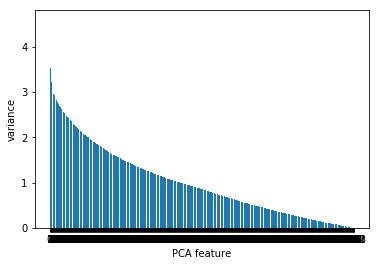

In [33]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [34]:
pca_1=PCA(n_components=1)
pca_2=PCA(n_components=2)
pca_3=PCA(n_components=3)

In [35]:
pca1_features=pca_1.fit_transform(tf_feature)
pca2_features=pca_2.fit_transform(tf_feature)
pca3_features=pca_3.fit_transform(tf_feature)

In [36]:
pca1_x = pca1_features[:,0]
pca2_x=pca2_features[:,0]
pca3_x=pca3_features[:,0]

pca1_y=len(pca2_x)*[0]
pca2_y = pca2_features[:,1]
pca3_y=pca3_features[:,1]
pca3_z=pca3_features[:,2]

In [55]:
pca1_y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


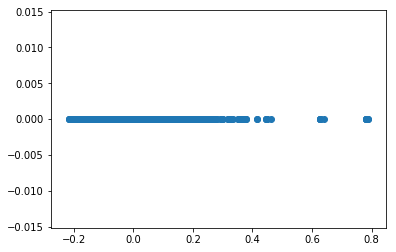

In [37]:
plt.scatter(pca1_x,pca1_y)

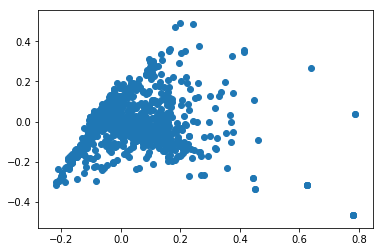

In [38]:
plt.scatter(pca2_x,pca2_y)

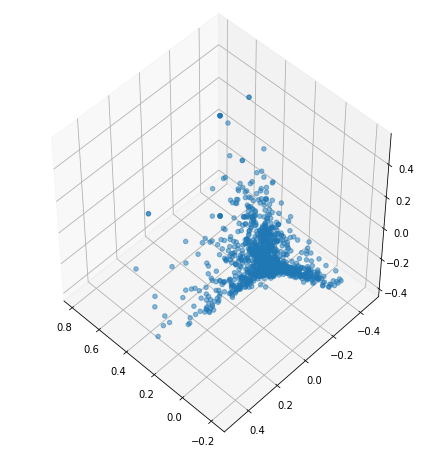

In [39]:
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(pca3_x,pca3_y,pca3_z,alpha=0.5)

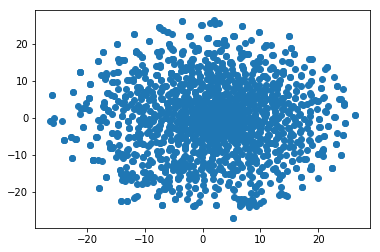

In [23]:
plt.scatter(xs1,ys1)
plt.show()

In [47]:
dim_mat=pd.DataFrame(xs1)
dim_mat.columns=['TSNE_X']

In [87]:
dim_mat['TSNE_Y'] = pd.DataFrame(ys1)
dim_mat['pca1_X']=pca1_x
dim_mat['pca1_Y']=pca1_y
dim_mat['pca2_X']=pca2_x
dim_mat['pca2_Y']=pca2_y
dim_mat['pca3_X']=pca3_x
dim_mat['pca3_Y']=pca3_y
dim_mat['pca3_Z']=pca3_z

In [83]:
dim_mat

,TSNE_X,TSNE_Y,pca1_X,pca1_Y,pca2_X,pca2_Y,pca3_X,pca2_Z,raw_kmeans_pred,TSNE_kmeans_pred,pca1_kmeans_pred,pca2_kmeans_pred,pca3_kmeans_pred,pca3_Z
0,22.714613,10.985476,0.034190,0,0.034297,-0.055798,0.034219,-0.065501,0,1,1,0,0,-0.065501
1,-8.364657,1.103165,-0.036241,0,-0.035958,-0.046780,-0.035600,0.035623,0,2,0,0,0,0.035623
2,11.480925,-1.629623,-0.053304,0,-0.053194,0.019323,-0.053258,0.007696,0,1,0,0,0,0.007696
3,6.099875,-11.999132,-0.063391,0,-0.063262,0.020306,-0.063347,0.009544,0,1,0,0,0,0.009544
4,-11.136656,-4.029884,-0.063280,0,-0.063145,0.027514,-0.063220,0.009164,0,2,0,0,0,0.009164
5,-11.907365,-9.853520,0.001821,0,0.001834,-0.014778,0.001909,0.083116,0,2,0,0,0,0.083116
6,-10.377694,-7.152734,-0.079162,0,-0.079100,0.004406,-0.079194,-0.012530,0,2,0,0,0,-0.012530
7,-13.032934,-9.933743,-0.057746,0,-0.057490,0.001767,-0.057680,-0.009039,0,2,0,0,0,-0.009039
8,3.981289,6.684548,-0.070989,0,-0.070655,0.015421,-0.071185,0.011335,0,0,0,0,0,0.011335
9,22.443611,-13.505564,-0.085471,0,-0.085738,-0.040565,-0.085553,-0.027146,0,1,0,0,0,-0.027146


In [24]:
from sklearn.cluster import KMeans

In [68]:
model_kmeans = KMeans(n_clusters=3,algorithm='auto')
model_kmeans.fit(tf_feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [69]:
raw_kmeans_pred=model_kmeans.predict(tf_feature)

In [70]:
model_kmeans.fit(transformed)
TSNE_kmeans_pred=model_kmeans.predict(transformed)

In [71]:
model_kmeans.fit(pca1_features)
pca1_kmeans_pred=model_kmeans.predict(pca1_features)

In [72]:
model_kmeans.fit(pca2_features)
pca2_kmeans_pred=model_kmeans.predict(pca2_features)

In [73]:
model_kmeans.fit(pca3_features)
pca3_kmeans_pred=model_kmeans.predict(pca3_features)

In [74]:
dim_mat['raw_kmeans_pred']=raw_kmeans_pred
dim_mat['TSNE_kmeans_pred']=TSNE_kmeans_pred
dim_mat['pca1_kmeans_pred']=pca1_kmeans_pred
dim_mat['pca2_kmeans_pred']=pca2_kmeans_pred
dim_mat['pca3_kmeans_pred']=pca3_kmeans_pred

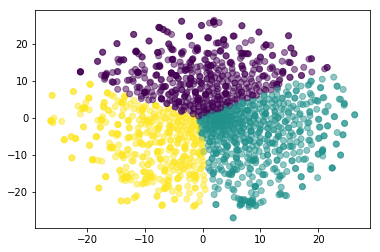

In [79]:
plt.scatter(dim_mat['TSNE_X'],dim_mat['TSNE_Y'],c=dim_mat['TSNE_kmeans_pred'],alpha=0.5)

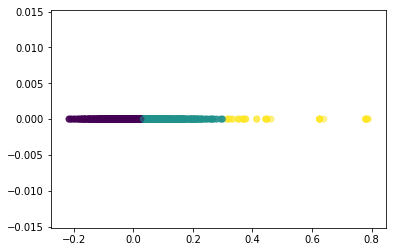

In [80]:
plt.scatter(dim_mat['pca1_X'],dim_mat['pca1_Y'],c=dim_mat['pca1_kmeans_pred'],alpha=0.5)

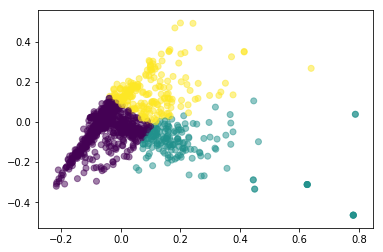

In [81]:
plt.scatter(dim_mat['pca2_X'],dim_mat['pca2_Y'],c=dim_mat['pca2_kmeans_pred'],alpha=0.5)

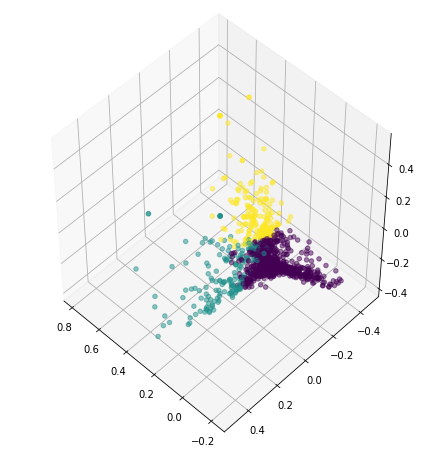

In [88]:
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(dim_mat['pca3_X'],dim_mat['pca3_Y'],dim_mat['pca3_Z'],c=dim_mat['pca3_kmeans_pred'],alpha=0.5)